Linear Regression


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [ ]:
data= sns.load_dataset('penguins')

In [ ]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
data.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
data.shape

(344, 7)

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# info gives null value in dataset


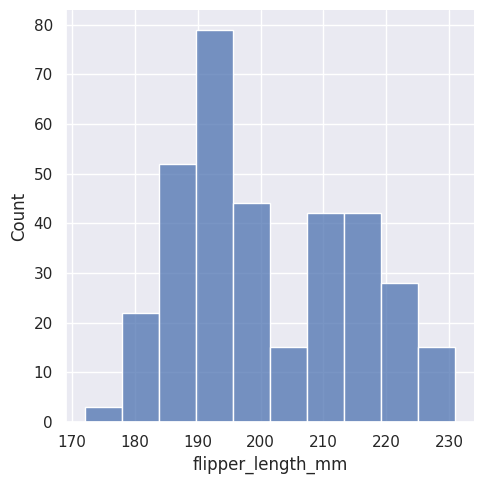

In [ ]:
sns.displot(data["flipper_length_mm"])

In [ ]:
# replicating distplot by line using kde

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

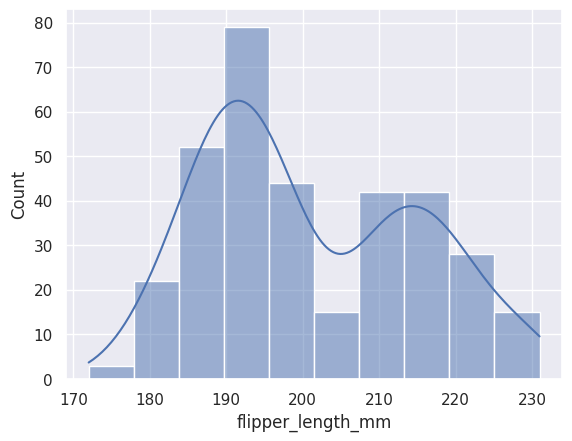

In [ ]:
sns.histplot(data["flipper_length_mm"], kde=True)

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

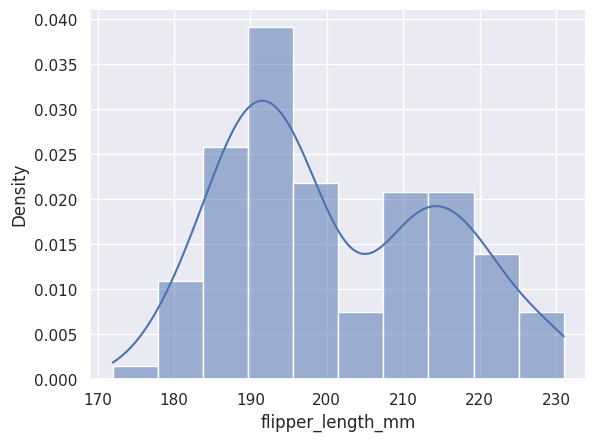

In [ ]:
sns.histplot(data["flipper_length_mm"], kde=True , stat="density")

<ipython-input-12-cacbb41af6a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["flipper_length_mm"], hist=False)


<Axes: xlabel='flipper_length_mm', ylabel='Density'>

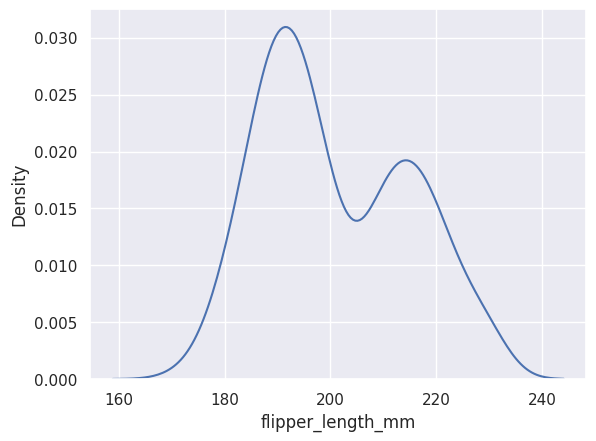

In [ ]:
sns.distplot(data["flipper_length_mm"], hist=False)


Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables[link text](https://)

> Indented block

> Indented block

> Indented block







<Axes: xlabel='flipper_length_mm', ylabel='Density'>

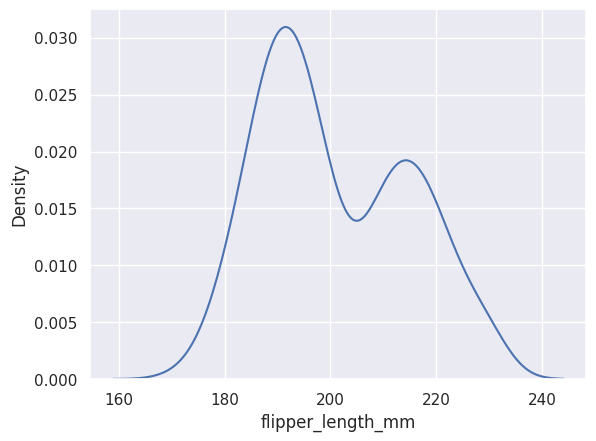

In [ ]:









sns.kdeplot(data["flipper_length_mm"])

In [ ]:
data.isna().sum()# to chech na in dataset, it can drop by fuction DROPNA

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
data.dropna(inplace=True) # to remove null value i use dropna function where inplace = true

In [ ]:
data.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
X= pd.DataFrame(data['species'])
y= pd.DataFrame(data['body_mass_g'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
#from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Specify the columns that need to be one-hot encoded
categorical_columns = ['species']

# Create a ColumnTransformer to apply one-hot encoding to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # Pass through the remaining columns as they are
)

# Apply the one-hot encoding and standard scaling transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Apply the standard scaling transformation
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [ ]:
from sklearn.linear_model import LinearRegression
my_model=LinearRegression()
my_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# prediction
prediction= my_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,prediction)

0.5479251564294403